## Heart Attack Analysis and it's Prediction

### Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Reading File

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Finding number of columns and rows

In [6]:
df.shape

(303, 14)

### Finding Null Values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Finding null values in chart form

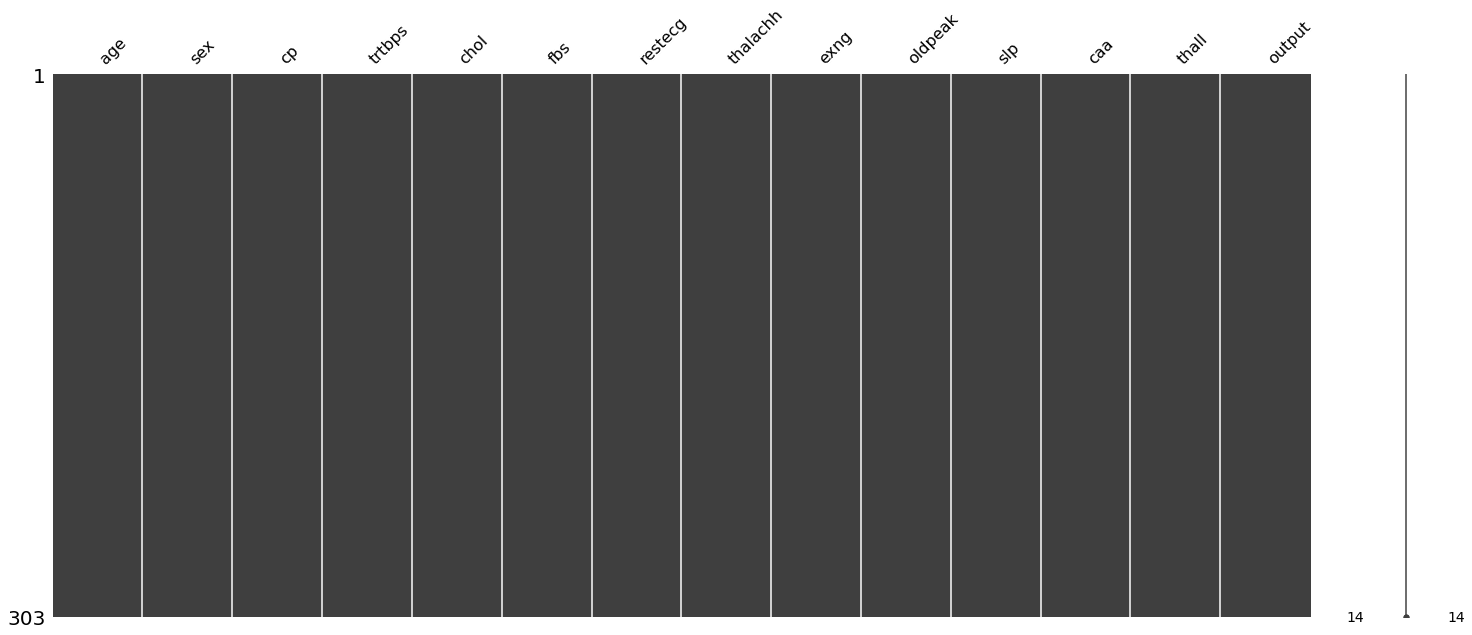

In [10]:
import missingno as ms
ms.matrix(df)

No null values are present

Value counts of Male and Female (0 is female and 1 is male)

In [9]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

Determining Data types of Columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Determining Unique Values

In [13]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## EDA

Output is the column determine people having heart attack.


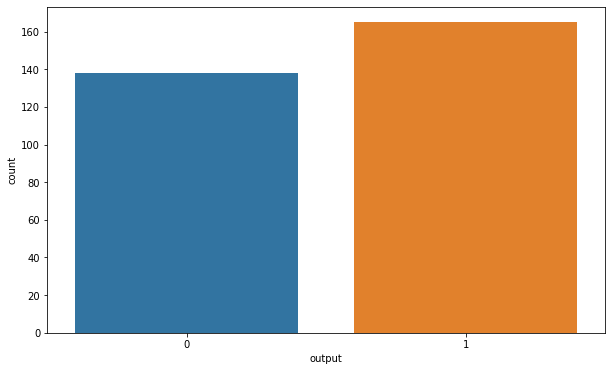

In [14]:
plt.figure(figsize = (10,6))
sb.countplot(df1["output"])

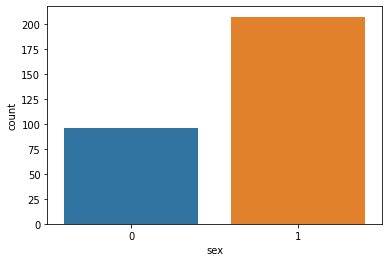

In [15]:
sb.countplot(df1["sex"])

## Age Distribution Graphs

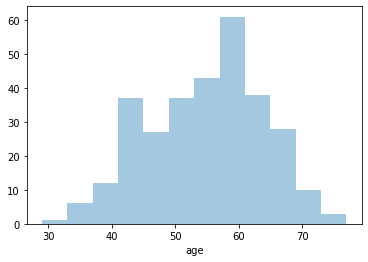

In [16]:
sb.distplot(df1["age"], kde = False)

Text(0.5, 1.0, 'Age Distribution')

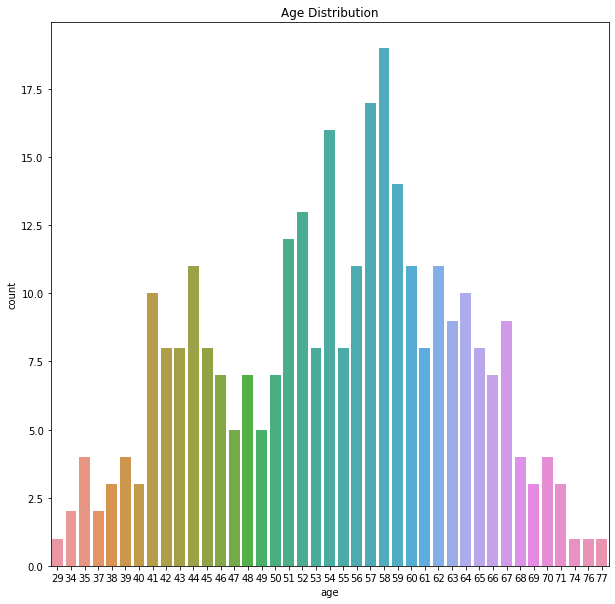

In [17]:
plt.figure(figsize = (10,10))
sb.countplot(df1["age"])
plt.title("Age Distribution")

People in the age group of 50s generally have higher tendency to have a heart attack then the other age groups

### Correlation between Columns

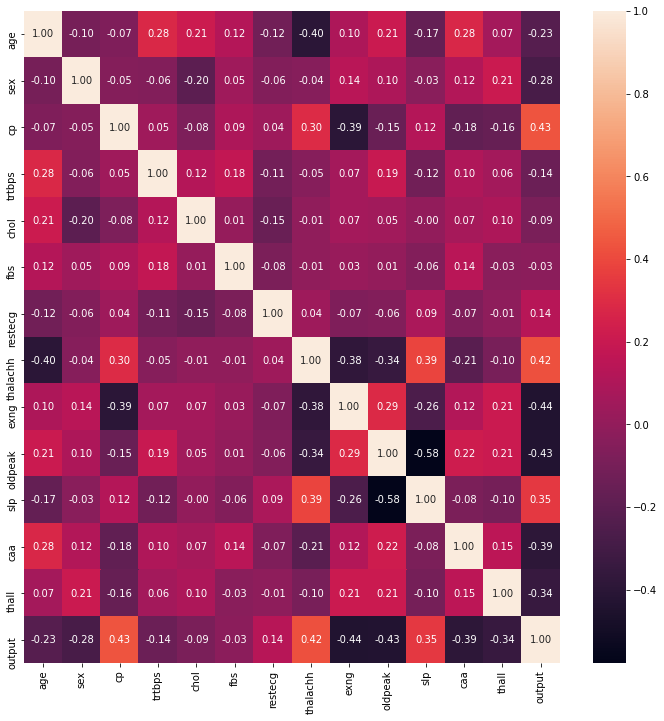

In [18]:
fig, ax = plt.subplots(figsize=[12,12])
sb.heatmap(df.corr(),fmt=".2f",annot=True)

### Visualising Categorical Columns/Variables with Output

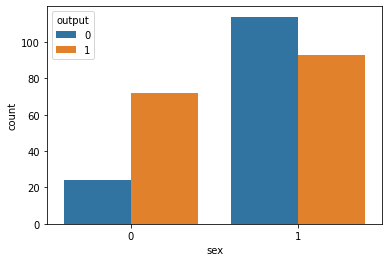

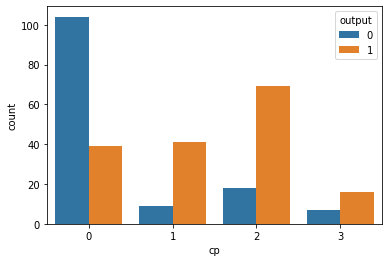

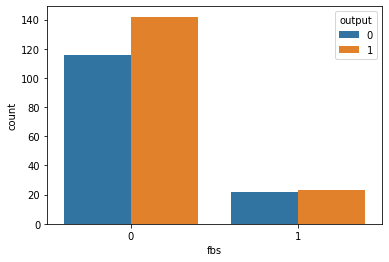

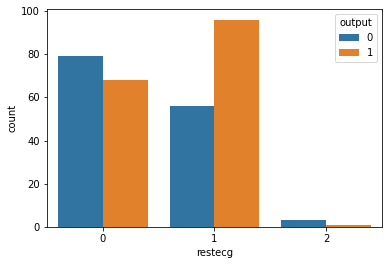

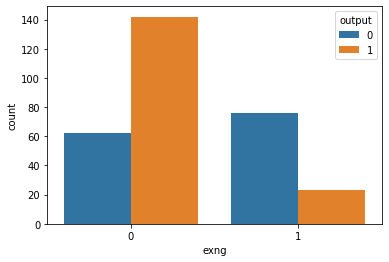

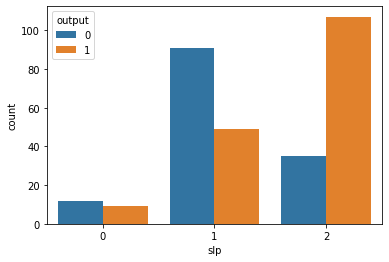

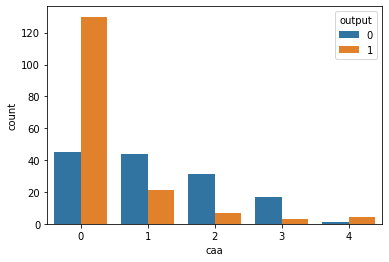

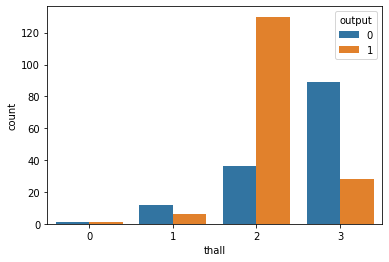

In [19]:
cat_var = [feature for feature in df.columns if df[feature].nunique()<10 and feature != "output"]
for var in cat_var:
    sb.countplot(df[var], hue = df['output'])
    plt.show()

### Visualising resting blood pressure(trtbps), cholestoral in mg/dl (chol), maximum heart rate(thalachh), oldpeak (Numerical Columns) with Output

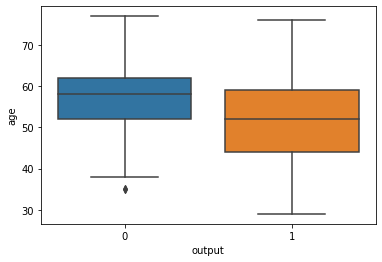

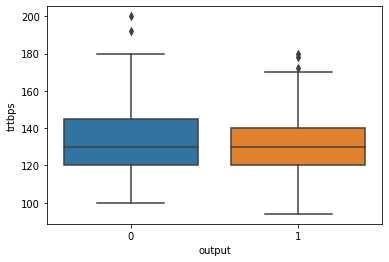

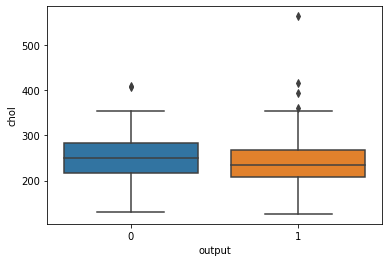

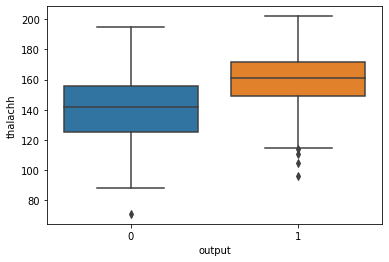

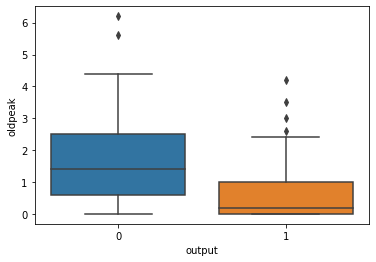

In [20]:
col_list = list(df1.columns)
num_var = [feature for feature in col_list if feature not in cat_var and feature!="output"]
for num in num_var:
    sb.boxplot(x = df1["output"] , y=df1[num])
    plt.show()

### Distribution of Factors such as resting blood pressure(trtbps), cholestoral in mg/dl (chol), maximum heart rate(thalachh), oldpeak effecting Heart Attack occurance

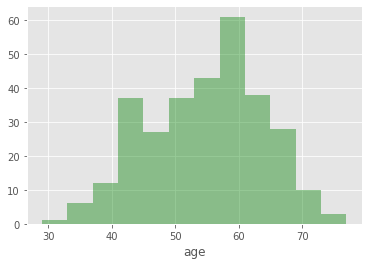

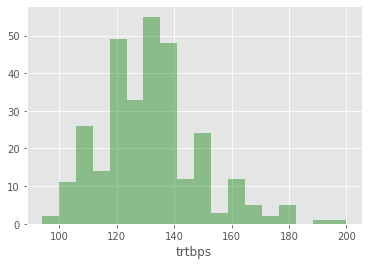

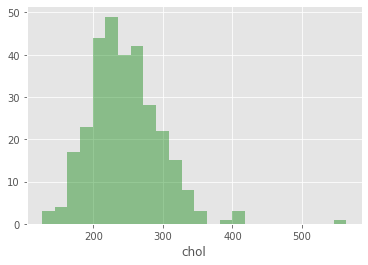

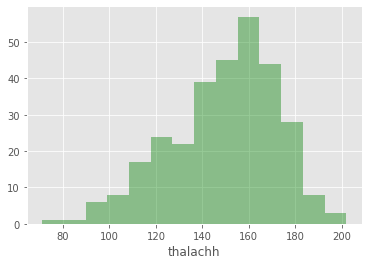

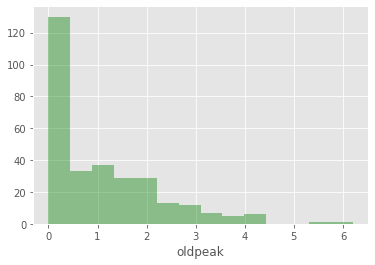

In [21]:
for num in num_var:
    plt.style.use("ggplot")
    sb.distplot(df1[num], kde = False, color="green")
    plt.show()

### Age and Heart Attack Relation

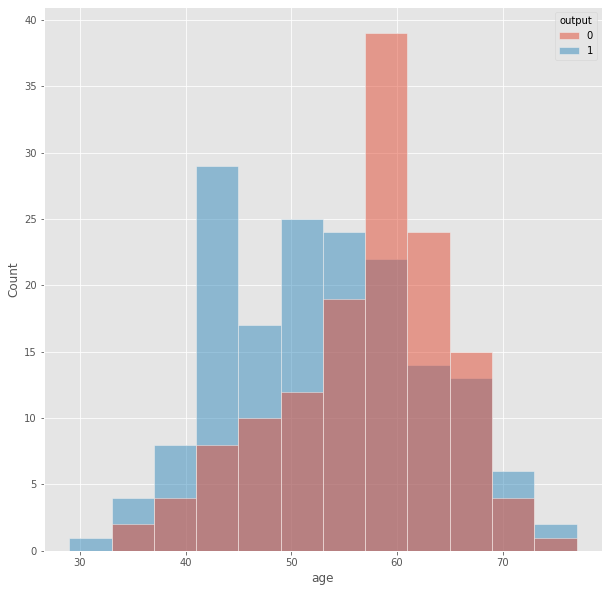

In [22]:
plt.figure(figsize=(10,10))
sb.histplot(data=df1, x='age', hue='output')

### Checking Skewness

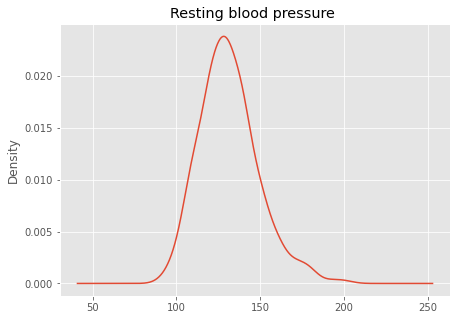

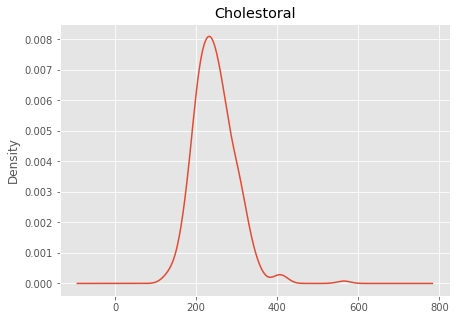

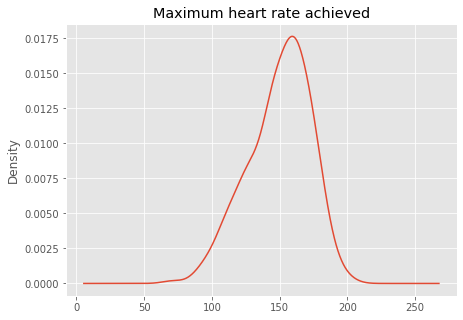

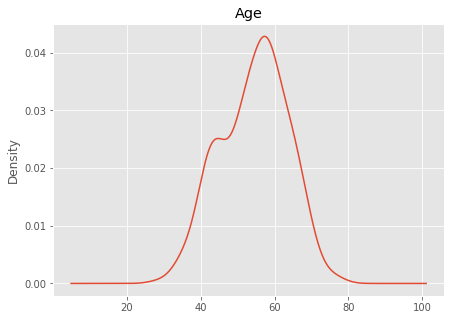

In [34]:
plt.figure(figsize=(7,5))
df['trtbps'].plot(kind='density')
plt.title("Resting blood pressure ")
plt.show()

plt.figure(figsize=(7,5))
df['chol'].plot(kind='density')
plt.title("Cholestoral")
plt.show()

plt.figure(figsize=(7,5))
df['thalachh'].plot(kind='density')
plt.title("Maximum heart rate achieved")
plt.show()

plt.figure(figsize=(7,5))
df['age'].plot(kind='density')
plt.title("Age")
plt.show()

In [23]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Removing Duplicate Values

In [24]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Selecting columns for Training and testing on a Model

In [26]:
X = df1.iloc [ : , : -1].values
y = df1.iloc [ :, -1].values

### Spliting in Training and Testing Set

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Displaying Values of X train, X test, Y train, Y test.
Test set contains the target column i.e Output. Whereas rest data is in training set 

In [38]:
x_train.shape

(212, 13)

In [40]:
x_test.shape

(91, 13)

In [39]:
y_train.shape

(212,)

In [41]:
y_test.shape

(91,)

### Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model=LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_acc = logistic_model. score (x_test, y_test)
print ("accuracy = ",logistic_acc)

accuracy =  0.7802197802197802


Accuracy is 78.02%

### K Nearest Neighbors Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Accuracy Score of Test Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.8867924528301887
Accuracy Score of Test Data is 0.7912087912087912



Accuracy is 79.12%

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(x_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Accuracy Score of Test Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Test Data is 0.7582417582417582



Accuracy is 75.82%

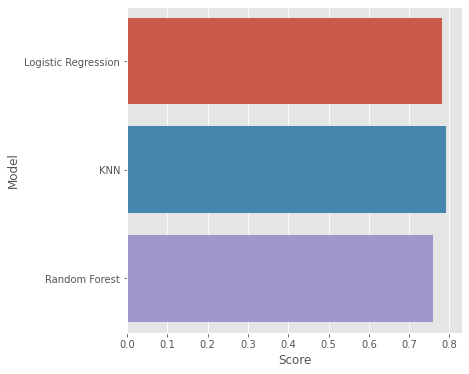

In [50]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','KNN','Random Forest'],
    'Score' : [logistic_acc,knn_acc,rf_acc]
})
models.sort_values(by = 'Score', ascending = False)
plt.figure(figsize = (6, 6))
sb.barplot(x = 'Score', y = 'Model', data = models)

plt.show()

Here we can see K Nearest Neighbors has greater accuracy and Random Forest has least accuracy for Categorical Data